<a href="https://colab.research.google.com/github/Anubhav25374/DeepScan-Character-Recognition/blob/main/Alphanumeric_Recognition_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_datasets as tfds
print("TFDS is available")



TFDS is available


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import string
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load EMNIST Letters dataset
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

print("Dataset loaded successfully!")
print("Number of classes:", ds_info.features['label'].num_classes)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.T1D8SQ_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.T1D8SQ_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.
Dataset loaded successfully!
Number of classes: 37


In [ ]:
# Function to process dataset
def process_dataset(dataset):
    images = []
    labels = []

    for image, label in tfds.as_numpy(dataset):
        # Fix rotation (EMNIST images are rotated & flipped)
        image = np.rot90(image, k=3)     # rotate 270 degrees
        image = np.fliplr(image)         # horizontal flip

        images.append(image)
        labels.append(label - 1)  # Labels start from 1 → convert to 0-25

    images = np.array(images)
    labels = np.array(labels)

    return images, labels


# Convert train and test sets
X_train, y_train = process_dataset(ds_train)
X_test, y_test = process_dataset(ds_test)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (88800, 28, 28, 1)
Test shape: (14800, 28, 28, 1)


In [ ]:
# Normalize pixel values (0-255 → 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# If shape is (num, 28, 28), reshape to (num, 28, 28, 1)
if len(X_train.shape) == 3:
    X_train = X_train.reshape(-1, 28, 28, 1)
    X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical (26 classes)
y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)

print("Final Training shape:", X_train.shape)
print("Final Test shape:", X_test.shape)


Final Training shape: (88800, 28, 28, 1)
Final Test shape: (14800, 28, 28, 1)


In [ ]:
model = Sequential()

# First Convolution Block
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))

# Second Convolution Block
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Third Convolution Block
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten
model.add(Flatten())

# Dense Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output Layer (26 letters)
model.add(Dense(26, activation='softmax'))

# Compile model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,538 (439.60 KB)

 Trainable params: 112,538 (439.60 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)


Epoch 1/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 75s 105ms/step - accuracy: 0.4563 - loss: 1.7968 - val_accuracy: 0.7899 - val_loss: 0.6159
Epoch 2/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 77s 99ms/step - accuracy: 0.7865 - loss: 0.6519 - val_accuracy: 0.8336 - val_loss: 0.4879
Epoch 3/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 67s 97ms/step - accuracy: 0.8359 - loss: 0.4988 - val_accuracy: 0.8631 - val_loss: 0.3931
Epoch 4/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 68s 99ms/step - accuracy: 0.8575 - loss: 0.4327 - val_accuracy: 0.8715 - val_loss: 0.3718
Epoch 5/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 67s 97ms/step - accuracy: 0.8739 - loss: 0.3870 - val_accuracy: 0.8739 - val_loss: 0.3584
Epoch 6/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 68s 98ms/step - accuracy: 0.8821 - loss: 0.3563 - val_accuracy: 0.8886 - val_loss: 0.3233
Epoch 7/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 69s 99ms/step - accuracy: 0.8899 - loss: 0.3297 - val_accuracy: 0.8894 - val_loss: 0.3170
Epoch 8/10
694/694 ━━━━━━━━━━━━━━━━━━━━ 69s 99ms/step - accuracy: 0.8982 - loss: 0.3016 -

In [ ]:
model.save("emnist_letter_model.keras")
print("Model saved in modern format!")


Model saved in modern format!


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8953 - loss: 0.3064
Test Accuracy: 0.8940540552139282


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving imagesz.png to imagesz (4).png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Letter: Z
Confidence: 99.74%


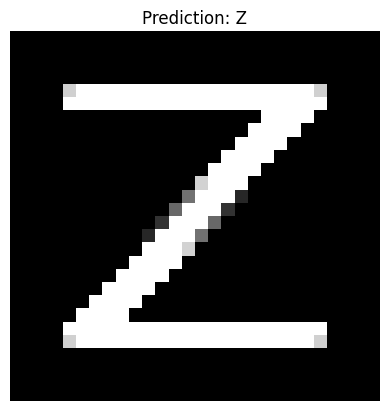

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import string

img_path = "imagesz.png"

# Read image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Blur slightly (reduces pixel noise)
img = cv2.GaussianBlur(img, (5,5), 0)

# Threshold (clean binary)
_, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find bounding box of letter
coords = cv2.findNonZero(img)
x, y, w, h = cv2.boundingRect(coords)

# Crop to letter
img = img[y:y+h, x:x+w]

# Resize while keeping aspect ratio
img = cv2.resize(img, (20, 20))

# Add padding to make 28x28
img = np.pad(img, ((4,4),(4,4)), mode='constant', constant_values=0)

# Normalize
img = img / 255.0

# Reshape
img = img.reshape(1, 28, 28, 1)

# Predict
prediction = model.predict(img)
predicted_index = np.argmax(prediction)
confidence = np.max(prediction) * 100

letter = string.ascii_uppercase[predicted_index]

print("Predicted Letter:", letter)
print("Confidence: {:.2f}%".format(confidence))

plt.imshow(img.reshape(28,28), cmap='gray')
plt.title(f"Prediction: {letter}")
plt.axis('off')
plt.show()
